First five rows of the dataset:

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

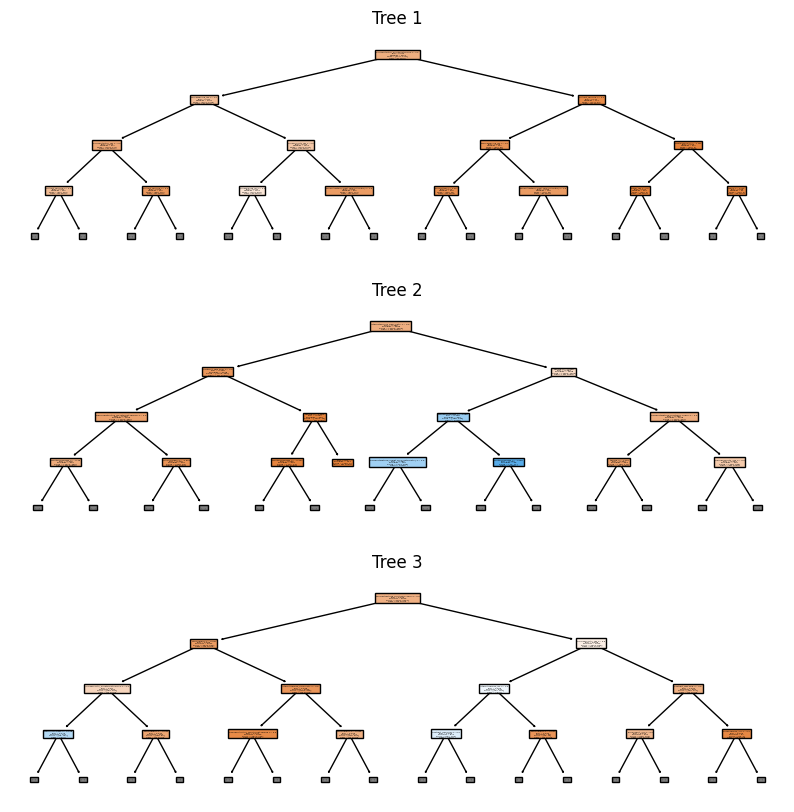

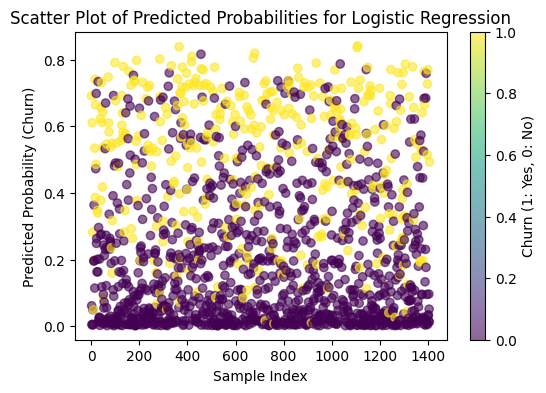


Gradient Boosting Classifier:



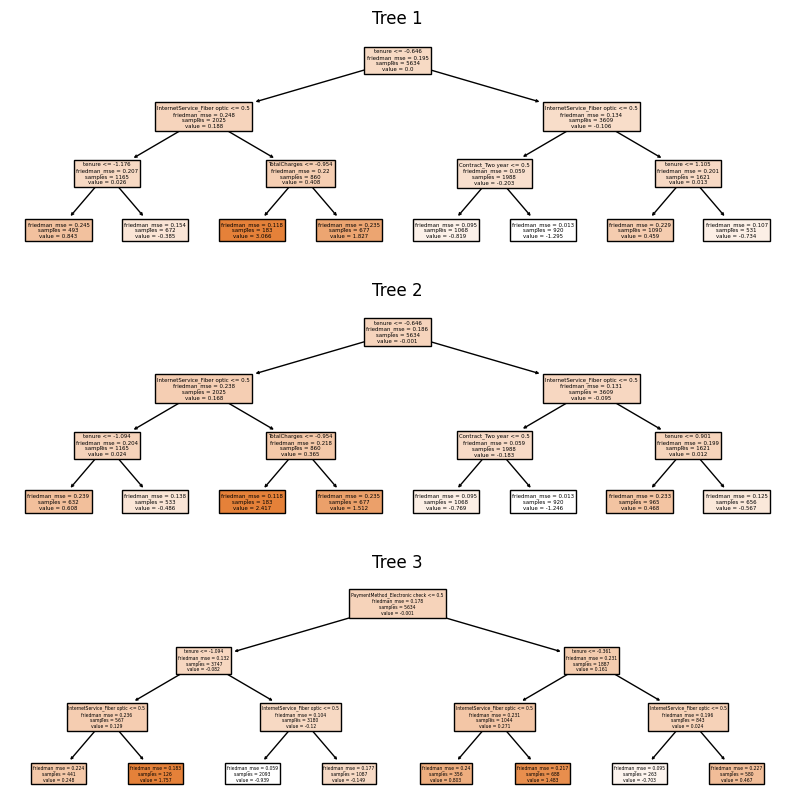

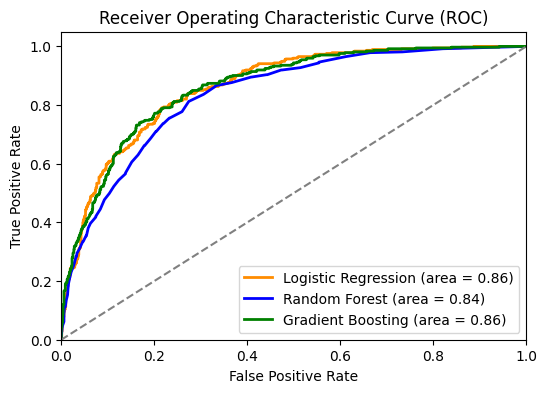



Performance metrics for Logistic Regression:

Accuracy: 0.8211497515968772
Precision: 0.6861538461538461
Recall: 0.5978552278820375
F1 Score: 0.6389684813753581
ROC-AUC: 0.7496998147132194
Confusion Matrix:
[[934 102]
 [150 223]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Performance metrics for Random Forest:

Accuracy: 0.7934705464868701
Precision: 0.6496350364963503
Recall: 0.4772117962466488
F1 Score: 0.5502318392581145
ROC-AUC: 0.692273851791278
Confusion Matrix:
[[940  96]
 [195 178]]

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1036
        True       0.65      0.48      0.55       373

    a

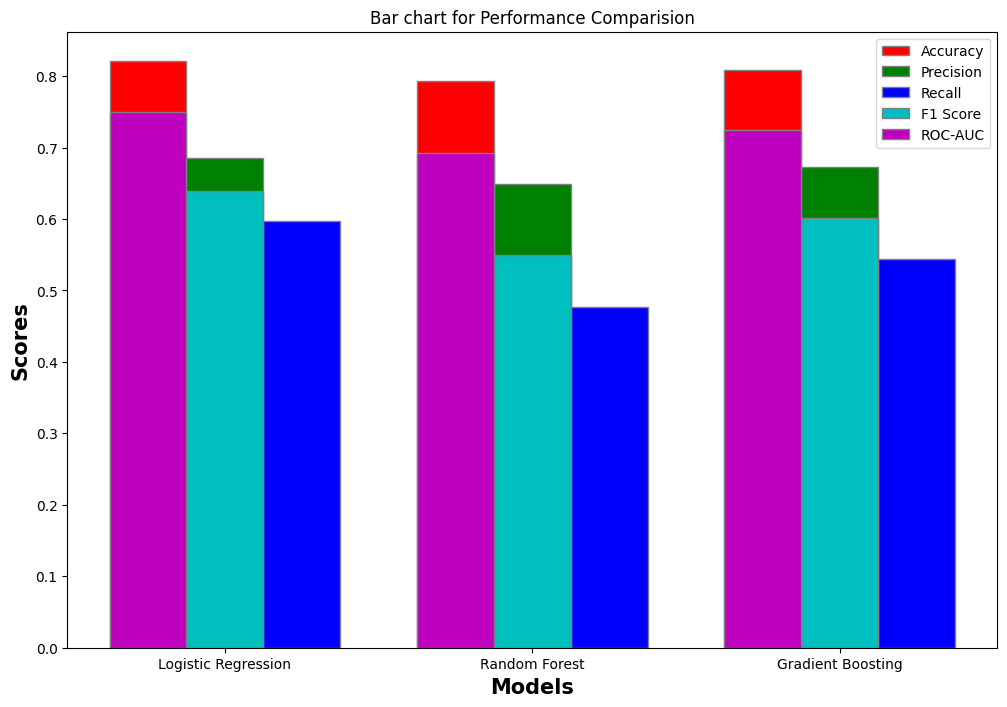


Conclusion:

Therefore, the best algorithm for predicting customer churn in this dataset is: Logistic Regression


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc

# Load the dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Display the first five rows of the dataset
print("First five rows of the dataset:\n")
print(df.head(5))

# Display the shape of the dataset (number of instances and number of attributes)
print("\nShape of the dataset:")
print(f"Number of instances: {df.shape[0]}")
print(f"Number of attributes: {df.shape[1]}")

# Display information about the dataset
print("\nInformation about the Dataset:\n")
print(df.info())

# Display basic statistics
print("\nDescription of the Dataset:\n")
print(df.describe())

# Check for missing values
print("\nChecking missing values in the dataset:\n")
missing_values = df.isnull().sum()
print(missing_values)

# Convert 'TotalCharges' to numeric, setting errors='coerce' to handle non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill any resulting missing values with the median of the column
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

# Display the first five rows of the encoded dataset
print("\nFirst five rows of the encoded dataset :\n")
print(df_encoded.head(5))

# Identify numerical features
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Standardize the numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first five rows of the scaled dataset
print("\nFirst five rows of the scaled dataset :\n")
print(df_encoded.head(5))

# Split the dataset into features and target variable
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

print("\nFeatures:\n")
print(X.head(5))

print("\nTarget Variable:\n")
print(y.head(5))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=50,random_state=42)
gb = GradientBoostingClassifier()

# Train the models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Visualize the decision trees in the RandomForestClassifier
print("\nRandom Forest Classifier:\n")
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plot_tree(rf.estimators_[i],
              max_depth=3,
              feature_names=X.columns,
              class_names=['No Churn', 'Churn'],
              filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

# Scatter plot
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
plt.figure(figsize=(6, 4))
plt.scatter(np.arange(len(y_prob_log_reg)), y_prob_log_reg, c=y_test, cmap='viridis', alpha=0.6)
plt.colorbar(label='Churn (1: Yes, 0: No)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability (Churn)')
plt.title('Scatter Plot of Predicted Probabilities for Logistic Regression')
plt.show()

# Visualize the decision trees in the GradientBoostingClassifier
plt.figure(figsize=(10, 10))
print("\nGradient Boosting Classifier:\n")
for i in range(3):
    plt.subplot(3, 1, i+1)
    plot_tree(gb.estimators_[i, 0],
              max_depth=3,
              feature_names=X.columns,
              class_names=['No Churn', 'Churn'],
              filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

# Compute ROC curve and ROC area for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and ROC area for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plotting the ROC Curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'Logistic Regression (area = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend(loc="lower right")
plt.show()

# Evaluate the models
models = {'Logistic Regression': y_pred_log_reg, 'Random Forest': y_pred_rf, 'Gradient Boosting': y_pred_gb}
metrics = {'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score, 'F1 Score': f1_score, 'ROC-AUC': roc_auc_score}
print("\n")
for model_name, y_pred in models.items():
    print(f"Performance metrics for {model_name}:\n")
    for metric_name, metric_func in metrics.items():
        if metric_name == 'ROC-AUC':
            print(f"{metric_name}: {metric_func(y_test, y_pred)}")
        else:
            print(f"{metric_name}: {metric_func(y_test, y_pred)}")

    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Collect performance metrics
performance_metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb)],
    'Precision': [precision_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_gb)],
    'Recall': [recall_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_gb)],
    'F1 Score': [f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_gb)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_log_reg), roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_gb)]
}
# Plot the performance metrics
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(performance_metrics['Accuracy']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
ax.bar(br1, performance_metrics['Accuracy'], color ='r', width = barWidth, edgecolor ='grey', label ='Accuracy')
ax.bar(br2, performance_metrics['Precision'], color ='g', width = barWidth, edgecolor ='grey', label ='Precision')
ax.bar(br3, performance_metrics['Recall'], color ='b', width = barWidth, edgecolor ='grey', label ='Recall')
ax.bar(br2, performance_metrics['F1 Score'], color ='c', width = barWidth, edgecolor ='grey', label ='F1 Score')
ax.bar(br1, performance_metrics['ROC-AUC'], color ='m', width = barWidth, edgecolor ='grey', label ='ROC-AUC')

# Adding Xticks
ax.set_xlabel('Models', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Scores', fontweight ='bold', fontsize = 15)
ax.set_xticks([r + barWidth for r in range(len(performance_metrics['Accuracy']))])
ax.set_xticklabels(['Logistic Regression', 'Random Forest', 'Gradient Boosting'])

# Display the bar chart
plt.title("Bar chart for Performance Comparision")
plt.legend()
plt.show()

# Conclusion
print("\nConclusion:\n")
roc_auc_scores = {
    'Logistic Regression': roc_auc_log_reg,
    'Random Forest': roc_auc_rf,
    'Gradient Boosting': roc_auc_gb
}
best_model = max(roc_auc_scores, key=roc_auc_scores.get)
print(f"Therefore, the best algorithm for predicting customer churn in this dataset is: {best_model}")
